<a href="https://colab.research.google.com/github/qatrunnadarefac/PA_Gen-Z/blob/main/Prediksi_Risiko_Diabetes_menggunakan_Algoritma_Regresi_Logistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PA Gen-Z_Research Based**

Mochammad Januar Finandi, Arya Dwi Pratama Putra, Qatrunnada Refa Cahyani, Jathu Rianti, dan Devi Lestari Arianti.

*Coach*:
Abdiel Willyar Goni

#**Data Acquisition**

##**Sumber Data/Data Background**

Dataset ini tersedia di kaggle website: https://www.kaggle.com/uciml/pima-indians-diabetes-database. Dataset ini berasal dari National Institute of Diabetes and Digestive and Ginjal Diseases.

link dataset: https://drive.google.com/file/d/1itG1D5QT-1fOmRl8BgkL0hIuM_IVoK84/view?usp=sharing 

##**Fitur/Variabel**

Fitur/variabel independen:

*   Pregnancies = Jumlah kehamilan
*   Glucose = konsentrasi glukosa 2 jam dalam tes toleransi glukosa oral
*   BloodPressure = Tekanan darah diastolik (mm Hg)
*   SkinThickness = Ketebalan lipatan kulit (mm)
*   Insulin = 2-Jam serum insulin (mu U / ml)
*   BMI = Indeks massa tubuh (berat dalam kg / (tinggi dalam m) ^ 2)
*   DiabetesPedigreeFunction = Riwayat keturunan diabetes
*   Age = Umur (tahun)

Variabel Outcome/dependen = Class (0 atau 1) 268 dari 768 adalah 1, yang lain adalah 0

##**Memuat Kumpulan Data**

**Import library**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

Dataset ini berisi fitur/variabel yang dianalisis hubungannya untuk memprediksi seseorang dikatakan menderita diabetes atau tidak

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# check no. of columns and rows
df.shape

(768, 9)

In [ ]:
# check first 5 rows of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#**Preprocessing**

## **Data Duplikat**

In [ ]:
# memeriksa data duplikat
duplikat = df.duplicated()
duplikat.value_counts()

False    768
dtype: int64

Tidak terdapat data duplikat.

##**Missing Value**

In [ ]:
# check missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Saat dicek menggunakan isnull tidak terdapat missing value, namun nilai nol (0) pada beberapa variabel seperti glukosa, tekanan darah, ketebalan lipatan kulit, insulin, dan BMI merupakan hal yang kurang wajar

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Terlihat NaN sebagai missing value

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(np.NaN,0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Mengecek missing value

In [ ]:
#Menghitung jumlah nilai 0 pada kolom Glucose, BP, SkinTh, Insulin, BMI
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
(df[columns]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Mengatasi missing value

In [ ]:
# mengganti Nilai 0 pada beberapa variabel dengan mean
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in df[columns]:
  mean = df[i].mean()
  df[i].replace(0, mean, inplace=True)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


##**Outlier**

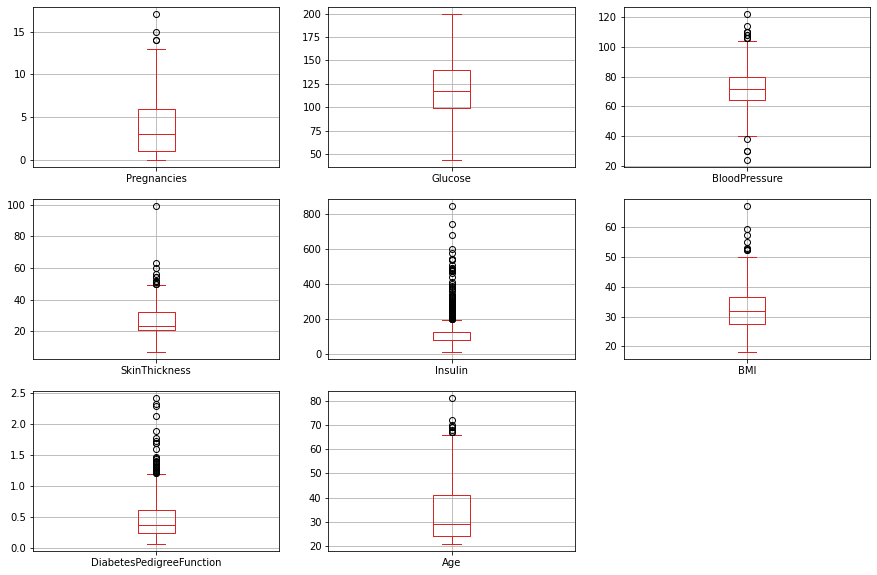

In [ ]:
#Memeriksa Outliers dengan Box Plot

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((3,3), (0,0))
ax2 = plt.subplot2grid((3,3), (0,1))
ax3 = plt.subplot2grid((3,3), (0,2))
ax4 = plt.subplot2grid((3,3), (1,0))
ax5 = plt.subplot2grid((3,3), (1,1))
ax6 = plt.subplot2grid((3,3), (1,2))
ax7 = plt.subplot2grid((3,3), (2,0))
ax8 = plt.subplot2grid((3,3), (2,1))

df['Pregnancies'].plot(ax=ax1, kind='box', grid=True, color='tab:red')
df['Glucose'].plot(ax=ax2, kind='box', grid=True, color='tab:red')
df['BloodPressure'].plot(ax=ax3, kind='box', grid=True, color='tab:red')
df['SkinThickness'].plot(ax=ax4, kind='box', grid=True, color='tab:red')
df['Insulin'].plot(ax=ax5, kind='box', grid=True, color='tab:red')
df['BMI'].plot(ax=ax6, kind='box', grid=True, color='tab:red')
df['DiabetesPedigreeFunction'].plot(ax=ax7, kind='box', grid=True, color='tab:red')
df['Age'].plot(ax=ax8, kind='box', grid=True, color='tab:red')

In [ ]:
#Menghapus Outliers dengan Z-score
from scipy import stats

col = list(df)[0:-1]
z_scores = np.abs(stats.zscore(df[col]))
z_scores = pd.DataFrame(z_scores)
z_scores = np.abs(z_scores)
filtered_entries = (z_scores < 3).all(axis=1)
df = df[filtered_entries]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [ ]:
df.shape

(718, 9)

#**EDA/Exploration**

##**Variabel Outcome/dependen**

In [ ]:
df['Outcome'].value_counts()

0    476
1    242
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


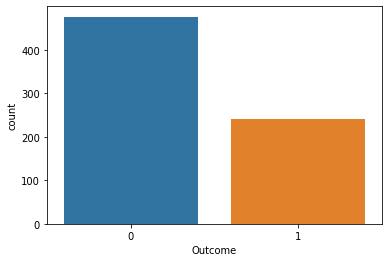

In [ ]:
import seaborn as sns

sns.countplot(df['Outcome'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29541e2910>,
      dtype=object)

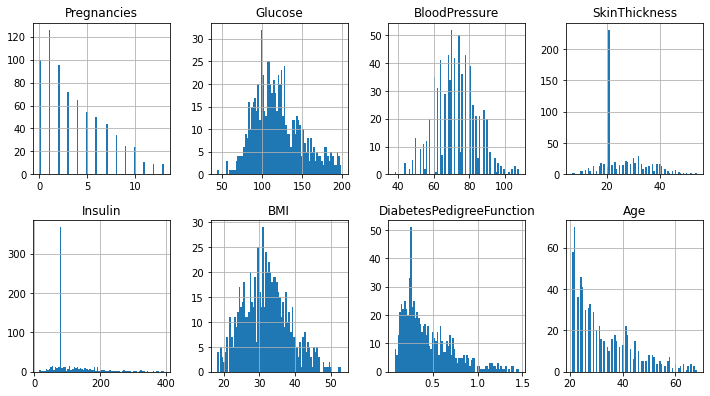

In [ ]:
# Let's plot histogram of first 8 columns
columns = list(df)[0:-1]
df[columns].hist(bins=80,figsize=(12,50), layout=(14,4))

Dari distribusi di atas kita dapat lihat bahwa variabel dari:

1. data **kehamilan** miring secara positif dan sebagian besar berkisar antara 0 hingga 13
2. **glukosa** hampir merata di sekitar level 105-110 sebagai puncak dan kisaran antara 70-140
3. **tekanan darah** terdistribusi secara merata antara 45-100
4. **ketebalan kulit** memiliki nilai nol tinggi yang menunjukkan kelainan pada data
5. **insulin** juga didistribusikan antara tingkat 0-250
6. **BMI** terdistribusi secara merata antara 18-42 dengan puncak sekitar 32
7. fungsi **silsilah diabetes** condong positif dan mayoritas terletak antara 0-1.5
8. data **usia** juga menunjukkan skewness positif memiliki nilai berkisar antara 20-60

## **Mengidentifikasi Korelasi (Hubungan antar Variabel Independen) dalam Data**

Gunakan singkatan untuk variabel

In [ ]:
df.rename(columns = {'DiabetesPedigreeFunction':'DPF',}, inplace = True)
df.rename(columns = {'BloodPressure':'BP','SkinThickness': 'SkinTh'}, inplace = True)

In [ ]:
# showing correlation matrix
df.corr()

,Pregnancies,Glucose,BP,SkinTh,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.138921,0.217568,0.046928,0.003181,0.051884,0.015734,0.560958,0.219725
Glucose,0.138921,1.000000,0.220034,0.094127,0.378115,0.210329,0.104726,0.267537,0.488041
BP,0.217568,0.220034,1.000000,0.155218,0.000884,0.305456,0.032480,0.362495,0.184740
SkinTh,0.046928,0.094127,0.155218,1.000000,0.256912,0.522148,0.115513,0.027029,0.147980
Insulin,0.003181,0.378115,0.000884,0.256912,1.000000,0.191963,0.161374,0.043988,0.181034
BMI,0.051884,0.210329,0.305456,0.522148,0.191963,1.000000,0.125086,0.071014,0.303658
DPF,0.015734,0.104726,0.032480,0.115513,0.161374,0.125086,1.000000,0.070085,0.208946
Age,0.560958,0.267537,0.362495,0.027029,0.043988,0.071014,0.070085,1.000000,0.245727
Outcome,0.219725,0.488041,0.184740,0.147980,0.181034,0.303658,0.208946,0.245727,1.000000


##**Peta Korelasi**

Jika nilai korelasi > 0, terdapat korelasi positif. Sementara nilai satu variabel meningkat, nilai variabel lainnya juga meningkat. Bila ada persamaan Korelasi = 0 berarti tidak ada korelasi. Jika korelasi < 0, ada korelasi negatif. Sementara satu variabel meningkat, variabel lainnya menurun. 

Ketika korelasi diperiksa, ada 2 variabel yang bertindak sebagai korelasi positif terhadap variabel dependen outcome. Variabel tersebut adalah Glukosa. Seiring peningkatan ini, variabel hasil/respon meningkat.

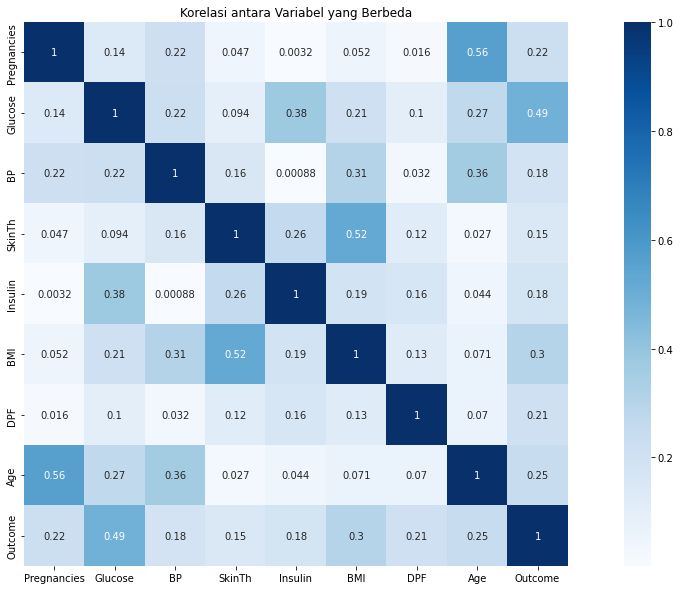

In [ ]:
# plotting a correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='Blues')
plt.title('Korelasi antara Variabel yang Berbeda')
plt.show()

Dari heatmap di atas, dapat kita amati bahwa semua variabel berkorelasi lemah sehingga menghilangkan multikolinearitas dari persamaan. Multikolinearitas (juga kolinearitas) adalah fenomena di mana satu variabel prediktor dalam model regresi berganda dapat diprediksi secara linier dari yang lain dengan tingkat akurasi yang substansial. Model Regresi Logistik mengasumsikan adanya non-collinearity di antara variabel, jika multicollinearity hadir dapat menyebabkan kinerja yang buruk dari model tersebut.

## **Hitung rasio diabetes Benar/Salah dari Variabel Dependen (Hasil)**

In [ ]:
#target column value and their counts
df['Outcome'].value_counts()

0    476
1    242
Name: Outcome, dtype: int64

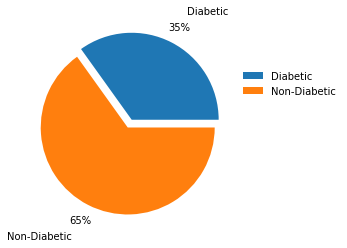

In [ ]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

Dapat dilihat 34,90% orang di dataset saat ini yang menderita diabetes dan sisanya 65,10% tidak menderita diabetes. Distribusi hasil yang cukup baik dalam data.

**Selanjutnya akan dilakukan pemodelan dan evaluasi dengan dua kasus, yakni tanpa normalisasi dan dengan normalisasi.**

#**Tanpa Normalisasi**

##**Split Data (Train & Test)**

In [ ]:
# Seperating the independent and dependent variable from the dataset
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Splitting into the training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
X_train.shape, X_test.shape

((502, 8), (216, 8))

502  data training dan 216 data testing dari jumlah keseluruhan data sebanyak 718.

In [ ]:
print("{}% data is in the training set".format((len(X_train)/len(df))*100))
print("{}% data is in the testing set".format((len(X_test)/len(df))*100))

69.91643454038997% data is in the training set
30.08356545961003% data is in the testing set


##**Modelling**

**Regresi Logistik** adalah salah satu tipe analisis regresi di statistik yang digunakan untuk memprediksi sebuah keluaran variabel dependen yang menjadi prediktor dari variabel independen. didalam regresi logistik banyak digunakan untuk memprediksi dan juga menghitung kesuksesan probabilitas

###**Buat Model Prediksi dan Fitting**

Setelah melihat peta korelasi, semua variabel digunakan untuk modelling. 

Setelah normalisasi dan split data, latih model dan fitting model. Model Regresi Logistik ini menggunakan solver liblinier. 

In [ ]:
# Creating and model and fitting data

logreg = LogisticRegression(solver='liblinear')
# solver {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
# ‘liblinear’ is ***limited to one-versus-rest schemes***

logreg.fit(X_train,y_train)
print(logreg.coef_, logreg.intercept_)

[[ 0.09411859  0.02835311 -0.02715903 -0.00548893 -0.00239406  0.0730822
   0.96195303  0.00719918]] [-5.27747216]


###**Prediksi Data**

In [ ]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg1 = logreg.predict(X_train)

###**Periksa Skor Model**

Data testing

In [ ]:
logreg_score = logreg.score(X_test,y_test)
print("Skor model adalah {}". format(logreg_score))

Skor model adalah 0.75


Data training

In [ ]:
logreg_score1 = logreg.score(X_train,y_train)
print("Skor model adalah {}". format(logreg_score1))

Skor model adalah 0.7868525896414342


##**Evaluation/Model Testing**

###**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_logreg)

array([[127,   7],
       [ 47,  35]])

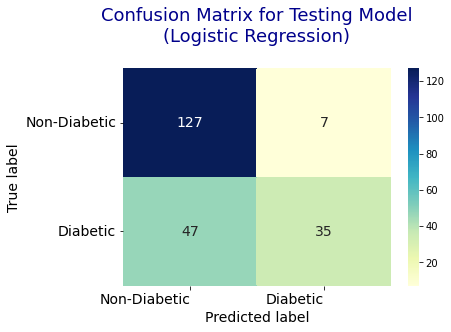

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_logreg)), 
                                   ('Non-Diabetic', 'Diabetic'),
                                   ('Non-Diabetic', 'Diabetic'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari matriks konfusi di atas terlihat jelas bahwa model telah memprediksi dengan benar 35(TP)+127(TN) = 162 sampel. Di sisi lain tidak dapat memprediksi 7(FP)+47(FN) = 54 sampel dengan benar.

Dengan melihat matriks konfusi terlihat metrik *recall* dapat digunakan sebagai acuan perbandingan.

###**Classification Report/Performance Metrics**

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
from sklearn.metrics import classification_report
from pprint import pprint as pp
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       134
           1       0.83      0.43      0.56        82

    accuracy                           0.75       216
   macro avg       0.78      0.69      0.69       216
weighted avg       0.77      0.75      0.73       216



0 Tidak Diabetes dan 1 Diabetes

*recall* 43%

#**Dengan Normalisasi**

Jika sebelumnya tanpa normalisasi mendapatkan *recall* 43% maka akan dicari apakah dengan menggunakan normalisasi dapat meningkatkan kinerja model.

##**Data Cleaning/Scaling/Normalisasi**

Normalisasi dengan *Min-Max Scaler* agar rentang nilai [0,1].

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled = pd.DataFrame(df)
scaled.head()

,Pregnancies,Glucose,BP,SkinTh,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(scaled)

[[0.46153846 0.67096774 0.48571429 ... 0.39696312 0.61702128 1.        ]
 [0.07692308 0.26451613 0.4        ... 0.19739696 0.21276596 0.        ]
 [0.61538462 0.89677419 0.37142857 ... 0.42950108 0.23404255 1.        ]
 ...
 [0.38461538 0.49677419 0.48571429 ... 0.12075199 0.19148936 0.        ]
 [0.07692308 0.52903226 0.31428571 ... 0.19595083 0.55319149 1.        ]
 [0.07692308 0.31612903 0.45714286 ... 0.17136659 0.04255319 0.        ]]


                0           1           2           3           4           5  \
count  718.000000  718.000000  718.000000  718.000000  718.000000  718.000000   
mean     0.294943    0.490560    0.487676    0.406613    0.245567    0.401409   
std      0.251972    0.191370    0.162212    0.190706    0.164389    0.186695   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.076923    0.354839    0.371429    0.288010    0.171882    0.265130   
50%      0.230769    0.458065    0.485714    0.319149    0.171882    0.397695   
75%      0.461538    0.606452    0.600000    0.531915    0.278515    0.515850   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8  
count  718.000000  718.000000  718.000000  
mean     0.268585    0.253630    0.337047  
std      0.204568    0.240796    0.473031  
min      0.000000    0.000000    0.000000  
25%      0.118221    0.063830    0.000000  
50%   

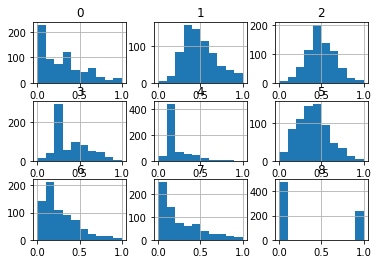

In [ ]:
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
trans = MinMaxScaler()
df = trans.fit_transform(df)
df = DataFrame(df)
print(df.describe())
df.hist()
pyplot.show()

##**Split Data (Train & Test)**

In [ ]:
df

,0,1,2,3,4,5,6,7,8
0,0.461538,0.670968,0.485714,0.595745,0.171882,0.443804,0.396963,0.617021,1.0
1,0.076923,0.264516,0.400000,0.468085,0.171882,0.242075,0.197397,0.212766,0.0
2,0.615385,0.896774,0.371429,0.288010,0.171882,0.146974,0.429501,0.234043,1.0
3,0.076923,0.290323,0.400000,0.340426,0.209549,0.285303,0.064353,0.000000,0.0
4,0.384615,0.464516,0.514286,0.288010,0.171882,0.213256,0.088937,0.191489,0.0
...,...,...,...,...,...,...,...,...,...
713,0.769231,0.367742,0.542857,0.872340,0.437666,0.423631,0.067245,0.893617,0.0
714,0.153846,0.503226,0.457143,0.425532,0.171882,0.536023,0.189443,0.127660,0.0
715,0.384615,0.496774,0.485714,0.340426,0.257294,0.230548,0.120752,0.191489,0.0
716,0.076923,0.529032,0.314286,0.288010,0.171882,0.342939,0.195951,0.553191,1.0


Dengan normalisasi data menggunakan MinMaxScaler terlihat pada training dan testing nilanya berada pada rentang [0,1].

In [ ]:
# Seperating the independent and dependent variable from the dataset
X = df.drop(8, axis=1)
y = df[8]

In [ ]:
# Splitting into the training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((502, 8), (216, 8))

In [ ]:
print("{}% data is in the training set".format((len(X_train)/len(df))*100))
print("{}% data is in the testing set".format((len(X_test)/len(df))*100))

69.91643454038997% data is in the training set
30.08356545961003% data is in the testing set


##**Modelling**

**Regresi Logistik** adalah salah satu tipe analisis regresi di statistik yang digunakan untuk memprediksi sebuah keluaran variabel dependen yang menjadi prediktor dari variabel independen. didalam regresi logistik banyak digunakan untuk memprediksi dan juga menghitung kesuksesan probabilitas

###**Buat Model Prediksi dan Fitting**

Setelah melihat peta korelasi, semua variabel digunakan untuk modelling. 

Setelah normalisasi dan split data, latih model dan fitting model. Model Regresi Logistik ini menggunakan solver liblinier. 

In [ ]:
# Creating and model and fitting data

logreg = LogisticRegression(solver='liblinear')
# solver {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
# ‘liblinear’ is limited to one-versus-rest schemes

logreg.fit(X_train,y_train)
print(logreg.coef_, logreg.intercept_)

[[ 0.52609527  3.79996492 -0.68934399  0.2306372   0.1883706   2.07041711
   1.4184194   0.9919976 ]] [-4.0710694]


###**Prediksi Data**

In [ ]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg1 = logreg.predict(X_train)

###**Periksa Skor Model**

Data testing

In [ ]:
logreg_score = logreg.score(X_test,y_test)
print("Skor model adalah {}". format(logreg_score))

Skor model adalah 0.7638888888888888


Data training

In [ ]:
logreg_score1 = logreg.score(X_train,y_train)
print("Skor model adalah {}". format(logreg_score1))

Skor model adalah 0.7928286852589641


Dapat dilihat skor model juga lebih tinggi. Selanjutnya lihat performance metrik *recall*

##**Evaluation/Model Testing**

###**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_logreg)

array([[127,  20],
       [ 31,  38]])

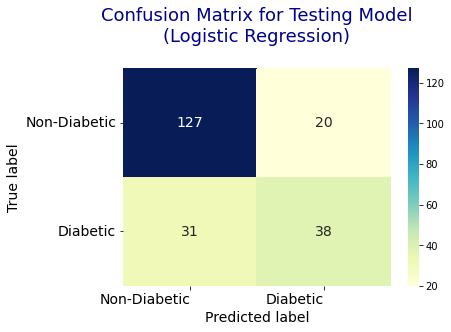

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_logreg)), 
                                   ('Non-Diabetic', 'Diabetic'),
                                   ('Non-Diabetic', 'Diabetic'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari matriks konfusi di atas terlihat jelas bahwa model telah memprediksi dengan benar 127(TP)+48(TN) = 175 sampel. Di sisi lain tidak dapat memprediksi 20(FP)+31(FN) = 51 sampel dengan benar.

###**Classification Report/Performance Metrics**

In [ ]:
# Print classification report
print('Classification Report Testing Model Logistic Regression with Normalisasi:')
print(classification_report(y_test, y_pred_logreg))

Classification Report Testing Model Logistic Regression with Normalisasi:
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       147
         1.0       0.66      0.55      0.60        69

    accuracy                           0.76       216
   macro avg       0.73      0.71      0.72       216
weighted avg       0.76      0.76      0.76       216



0 Tidak Diabetes dan 1 Diabetes

*recall* 55%. 
Dengan demikian, nilai *recall* pada model dengan normalisasi lebih tinggi sehingga terbukti dengan menggunakan normalisasi dapat meningkatkan kinerja prediksi pada model.